In [1]:
using InMemoryDatasets, StatisticalGraphics, DLMReader, Chain

Change the location and postion of labels

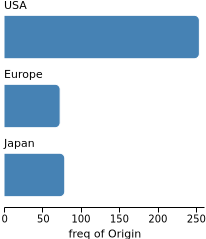

In [2]:
cars = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                              "..", "docs", "assets", "cars.csv"))

sgplot(cars, Bar(y=:Origin, barwidth=0.7, label=:category,
                    labelpos=:start, labelloc=0, barcorner=[0,5,0,5]),
                    yaxis=Axis(show=false),
                    clip=false,
                    height=200,
                    width=200)

Using the multiple charts to set multiple labels

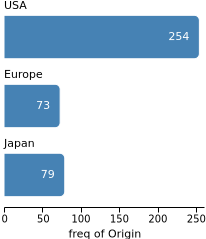

In [3]:
sgplot(cars, [
                Bar(y=:Origin, barwidth=0.7, label=:category,
                    labelpos=:start, labelloc=0, barcorner=[0,5,0,5]),
                Bar(y=:Origin, opacity=0, label=:height, labelcolor=:white,
                    labeloffset=-10)
             ],

                    yaxis=Axis(show=false),
                    clip=false,
                    height=200,
                    width=200)

Label bars with negative heights

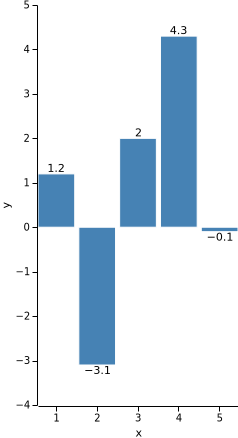

In [4]:
ds = Dataset(x=1:5, y=[1.2,-3.1,2,4.3,-.1])

sgplot(ds, Bar(x=:x, response=:y, label=:height,
                 labelbaseline=:bottom),
                 yaxis=Axis(title="y"),
                 width=200
)

Label grouped bar charts

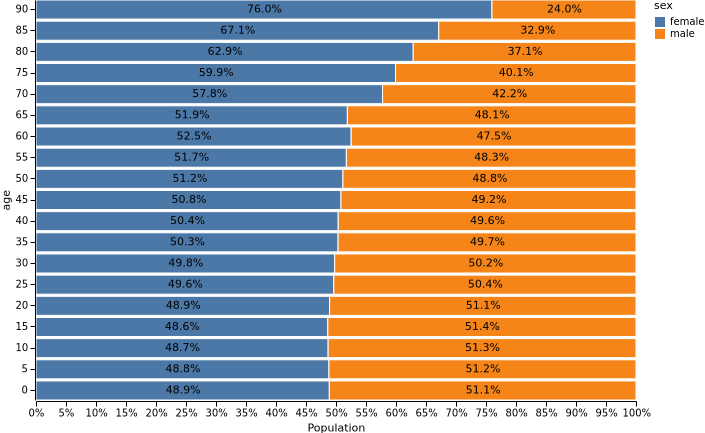

In [5]:
population = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                              "..", "docs", "assets", "population.csv"))

sex(x) = x == 1 ? "male" : "female" # format for :sex

setformat!(population, :sex => sex)

pop2000 = filter(population, :year, by = ==(2000))

sgplot(pop2000, Bar(y=:age, response=:people,
                         group=:sex, normalize=true, label=:height,
                         labelpos=:middle, labeld3format=".1%"),
                         xaxis=Axis(title="Population", d3format="%"),
                         yaxis=Axis(reverse=true))

Simulated data

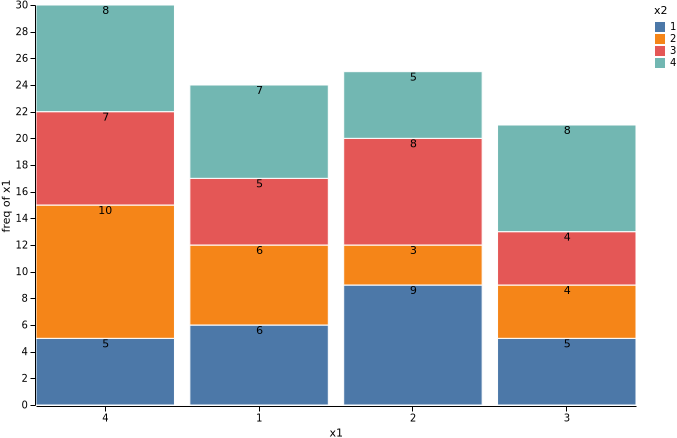

In [6]:
ds = Dataset(rand(1:4, 100, 2), :auto)

sgplot(ds, Bar(x=:x1, group=:x2, label=:height), nominal=:x2)

Passing `labelcolor=:auto` to assign label color based on the contrast of colors

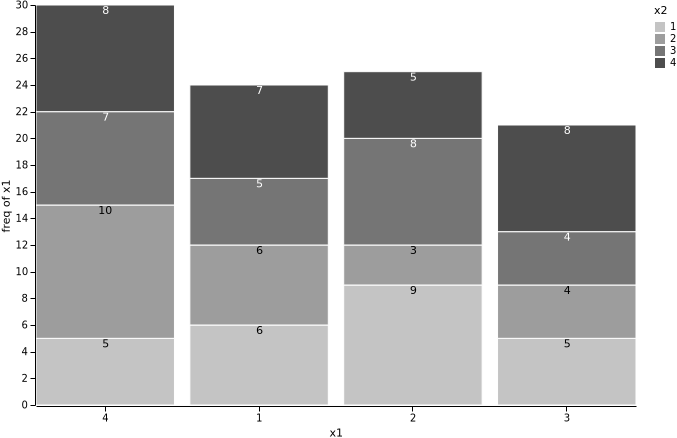

In [7]:
sgplot(ds, Bar(x=:x1, group=:x2, label=:height, labelcolor=:auto),
                    nominal=:x2, groupcolormodel=Dict(:scheme=>:greys))

example

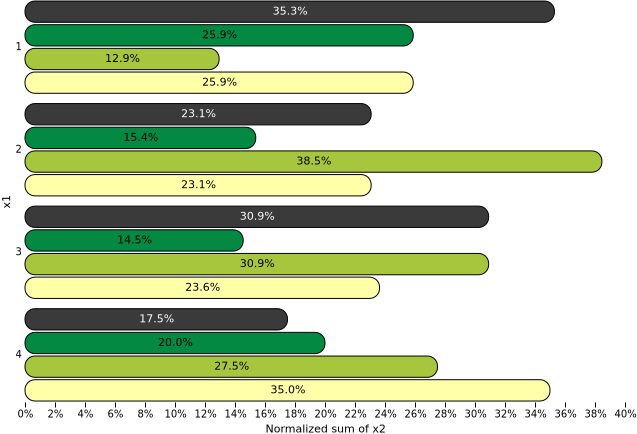

In [8]:
ds = Dataset(rand(1:4, 100, 10), :auto)

sgplot(ds, Bar(y=:x1, group=:x3, label=:height,
                labelcolor=:auto, response=:x2, space=0.1,
                labelpos=:middle, barcorner=10, normalize=true,
                labeld3format=".1%", outlinecolor=:black,
                groupspace=0.1, groupdisplay=:cluster),
                groupcolormodel=Dict(:scheme=>:darkgreen),
                xaxis=Axis(title="Normalized sum of x2", domain=false, d3format="%"),
                yaxis=Axis(domain=false, ticksize=0, order=:ascending),
                legend=false,
                clip=false)

Passing default `groupdisplay`

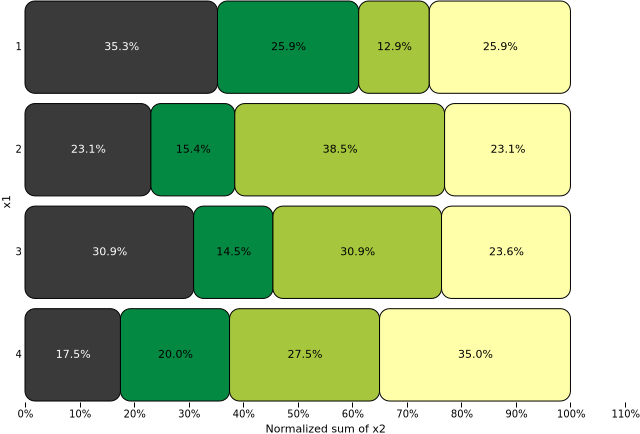

In [9]:
sgplot(ds, Bar(y=:x1, group=:x3, label=:height,
                labelcolor=:auto, response=:x2, space=0.1,
                labelpos=:middle, barcorner=10, normalize=true,
                labeld3format=".1%", outlinecolor=:black),
                groupcolormodel=Dict(:scheme=>:darkgreen),
                xaxis=Axis(title="Normalized sum of x2", domain=false, d3format="%"),
                yaxis=Axis(domain=false, ticksize=0, order=:ascending),
                legend=false,
                clip=false)

Population Change

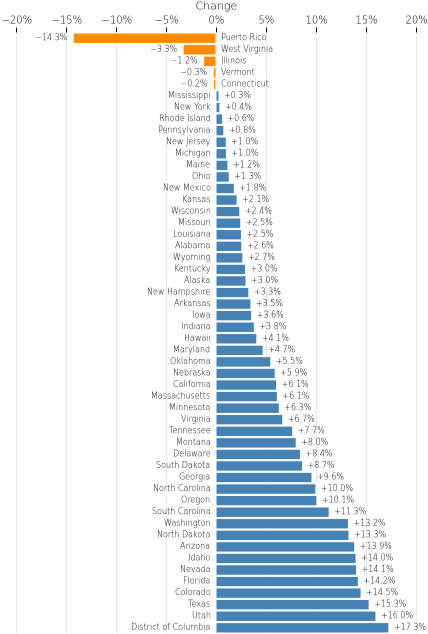

In [10]:
state_pop = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                              "..", "docs", "assets", "state-population-2010-2019.tsv"),
                              delimiter='\t')

@chain state_pop  begin
    modify!([2,3] => byrow(x->(x[1]-x[2])/x[2])=>:Change,
                 :Change=>byrow(>(0))=>:Color)
    sgplot([
            Bar(y=:State, response=:Change,
                orderresponse=:Change,
                colorresponse=:Color, colormodel=[:darkorange, :steelblue],
                label=:height, labeld3format="+.1%", labeloffset=5,
                labelalign=:left,
                labelsize=8,
                x2axis=true),
            Bar(y=:State, response=:Change, opacity=0,
                label=:category, labeloffset=-5, labelalign=:right,
                labelsize=8,labelpos=:start,
                x2axis=true)
            ],
            x2axis=Axis(title="Change", domain=false, d3format="%", grid=true),
            yaxis=Axis(show=false),
            clip=false,
            legend=false,
            fontweight=100,
            height=600,
            width=400
        )
end

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*